# 検証データのモデルPlot

## ライブラリのインポート

In [1]:
import os
import sys
sys.path.append('..') 
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from sklearn.utils import shuffle
from model.lenet import LeNet

from config import Config
from model.saver import Saver
from dataset.entity import Entity
from dataset.generator import Generator
from utility.visualize import display_images

## configの読み込み
* Config Classは~/work/template/config.pyで定義してあります。
* パスの定義とかをこんな感じでconfigでまとめてあげると綺麗になります。
* 乱数の種はセット推奨です。

In [2]:
config = Config()

np.random.seed(config.seed)
tf.random.set_seed(config.seed)

## Dataset読み込み
* オリジナルデータセットへの応用も考慮し、あえてローカルのMNISTデータセットを使う遠回しなコードにしてます。
* GeneratorはEpoch毎のミニバッチ生成をするクラスです。

In [3]:
'''検証データ'''
valid_df = pd.read_csv(config.dataset.valid_csv_path, header=None)
valid_np = valid_df.values
valid_data = [Entity(i) for i in valid_np]

## モデル構築

In [4]:
model = LeNet()

## チェックポイント読み込み

In [5]:
saver = Saver()
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), model=model)
manager = tf.train.CheckpointManager(checkpoint, 
                                     directory=config.model.checkpoint_dir,
                                     max_to_keep=5,
                                     checkpoint_name="chkp")
checkpoint.restore(manager.latest_checkpoint)

if manager.latest_checkpoint:
    saver.old_loss = model.valid_loss.result()
    print("restored!")
else:
    print("データがありません。学習後に実行ください。")

restored!


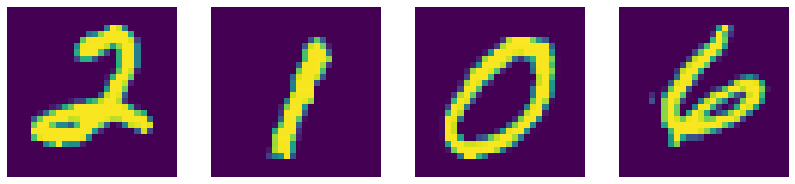

In [6]:
import random
sample_data =  np.random.choice(valid_data, 4)
display_images([data.x.reshape([28,28]) for data in sample_data])